In [17]:
import pandas as pd
csv = pd.read_csv('hotel_bookings.csv')
df = pd.DataFrame(csv)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [18]:
# Verificar si hay duplicados
duplicados = df.duplicated().sum()
print(f'Número de duplicados: {duplicados}')


Número de duplicados: 31994


In [19]:
# Convertir a datetime combinando tres columnas
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                     df['arrival_date_month'].astype(str) + '-' +
                                     df['arrival_date_day_of_month'].astype(str),
                                     errors='coerce', format='%Y-%B-%d')

# Verificar cambio
print(df['arrival_date'].head())


0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]


In [20]:
# Convertir reservation_status_date a datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Verificar cambio
print(df['reservation_status_date'].head())


0   2015-07-01
1   2015-07-01
2   2015-07-02
3   2015-07-02
4   2015-07-03
Name: reservation_status_date, dtype: datetime64[ns]


In [21]:
# Convertir valores categóricos a minúsculas
df['hotel'] = df['hotel'].str.lower()
df['deposit_type'] = df['deposit_type'].str.lower()

# Verificar valores únicos para asegurarse de la consistencia
print(df['hotel'].unique())
print(df['deposit_type'].unique())


['resort hotel' 'city hotel']
['no deposit' 'refundable' 'non refund']


In [34]:
# Rellenar valores faltantes en columnas categóricas
df['agent'] = df['agent'].fillna('Unknown')
df['company'] = df['company'].fillna('Unknown')
df['country'] = df['company'].fillna('Unknown')

# Verificar valores faltantes después del relleno
print(df.isnull().sum())


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [35]:
# Detectar valores anómalos en 'stays_in_week_nights' y 'stays_in_weekend_nights'
anomalous_stays = df[(df['stays_in_week_nights'] > 50) | (df['stays_in_weekend_nights'] > 50)]
print("Registros con estancias inusuales:")
print(anomalous_stays)

# Detectar valores de 'adr' inusuales (0 o negativos)
anomalous_adr = df[df['adr'] <= 0]
print("Registros con ADR inusuales:")
print(anomalous_adr)


Registros con estancias inusuales:
Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, arrival_date]
Index: []

[0 rows x 33 columns]
Registros con ADR inusuales:
               hotel  is_canceled  lead_time  arrival_date_year  \
0       resort hotel            0        342               2015   
1       resort hotel            0        737               2015   
125     resort hotel            0         32               2015   
167     resort hotel            0        

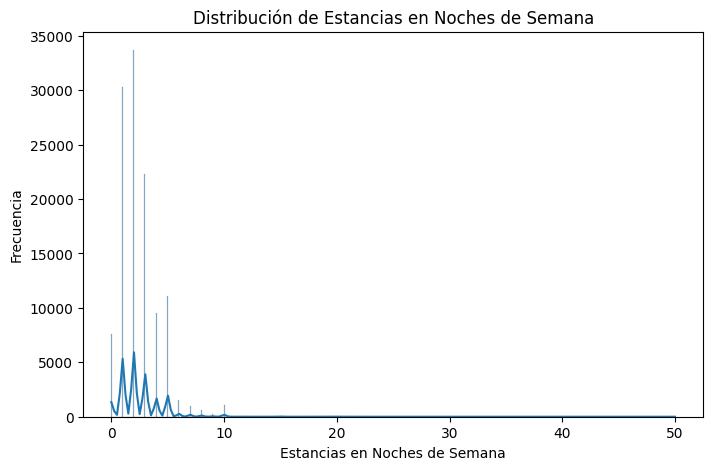

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de stays_in_week_nights
plt.figure(figsize=(8, 5))
sns.histplot(df['stays_in_week_nights'], kde=True)
plt.title('Distribución de Estancias en Noches de Semana')
plt.xlabel('Estancias en Noches de Semana')
plt.ylabel('Frecuencia')
plt.show()


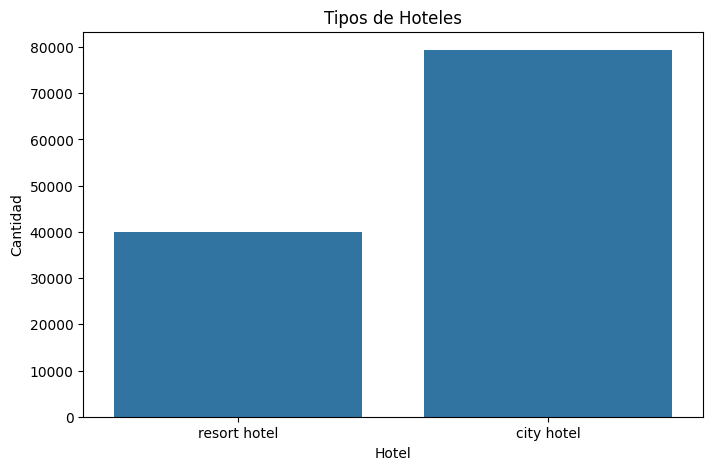

In [31]:
# Gráfico de barras de tipos de hotel
plt.figure(figsize=(8, 5))
sns.countplot(x='hotel', data=df)
plt.title('Tipos de Hoteles')
plt.xlabel('Hotel')
plt.ylabel('Cantidad')
plt.show()


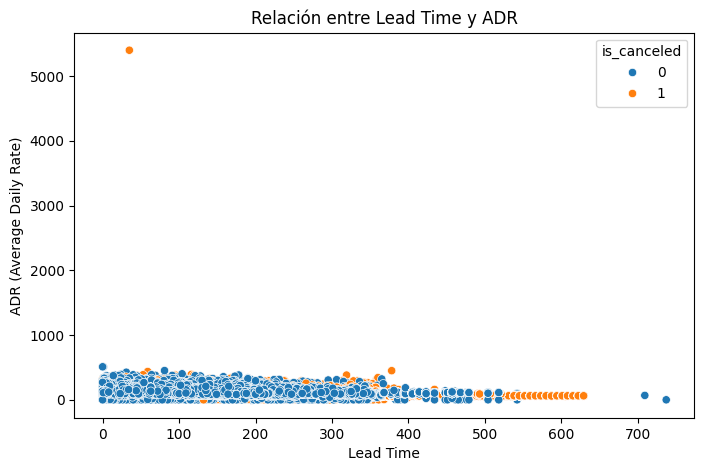

In [37]:
# Gráfico de dispersión entre lead_time y adr
plt.figure(figsize=(8, 5))
sns.scatterplot(x='lead_time', y='adr', data=df, hue= 'is_canceled')
plt.title('Relación entre Lead Time y ADR')
plt.xlabel('Lead Time')
plt.ylabel('ADR (Average Daily Rate)')
plt.show()


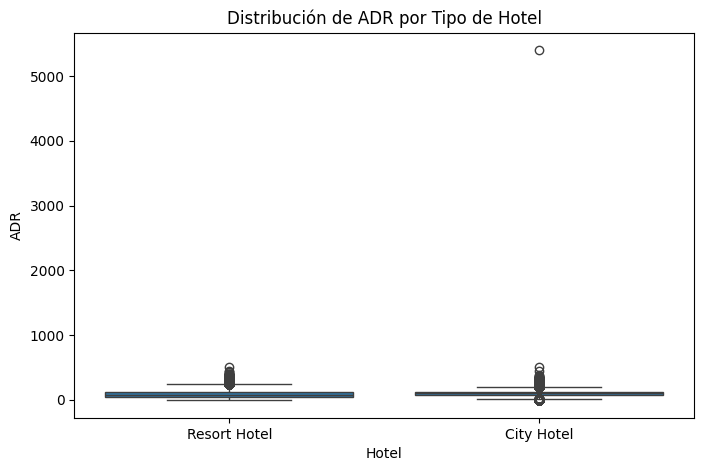

In [27]:
# Boxplot de adr por tipo de hotel
plt.figure(figsize=(8, 5))
sns.boxplot(x='hotel', y='adr', data=csv)
plt.title('Distribución de ADR por Tipo de Hotel')
plt.xlabel('Hotel')
plt.ylabel('ADR')
plt.show()


In [29]:
# Obtener un resumen estadístico
summary_stats = df.describe()
print("Resumen estadístico:")
print(summary_stats)

# Tendencia de Cancelación: Casi el 37% de las reservas fueron canceladas (media de 0.37 en is_canceled).
# Estancias Cortas: La mayoría de las estancias tanto en noches de semana como de fin de semana son cortas,
#con promedios de 2.5 noches y 0.93 noches respectivamente.
#Esto sugiere que los huéspedes tienden a hacer reservas de corta duración.

Resumen estadístico:
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   
std         0.482918     106.863097           0.707476   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   